# Análise da representatividade feminina nos parlamenos.

## Para a análise feita nessa avaliação, a dupla decidiu coletar dados relacionados ao objetivo da ONU de equidade entre gêneros. 

 É evidente que a representatividade feminina em posições de liderança reflete uma sociedade que preza pela igualdade de gênero, pois com uma presença majoritariamente masculina seriam tomadas decisões que não representariam um outro grupo. 

 Dada a importância dessa diversidade, reunimos dados do world bank que analisam a porcentagem de mulheres nos parlamentos dos países Brasil, Islândia e Haiti. Segundo o jornal ElPaís, a Islândia é um país de referência em igualdade de gênero e o Haiti o extremo oposto, notamos que mesmo em países como a Islândia o crescimento foi pouco e ainda assim não se aproxima a 50% de representatividade no parlamento.

 Referência:
   -https://brasil.elpais.com/sociedade/2021-03-31/pandemia-adia-igualdade-de-genero-por-mais-uma-geracao.html

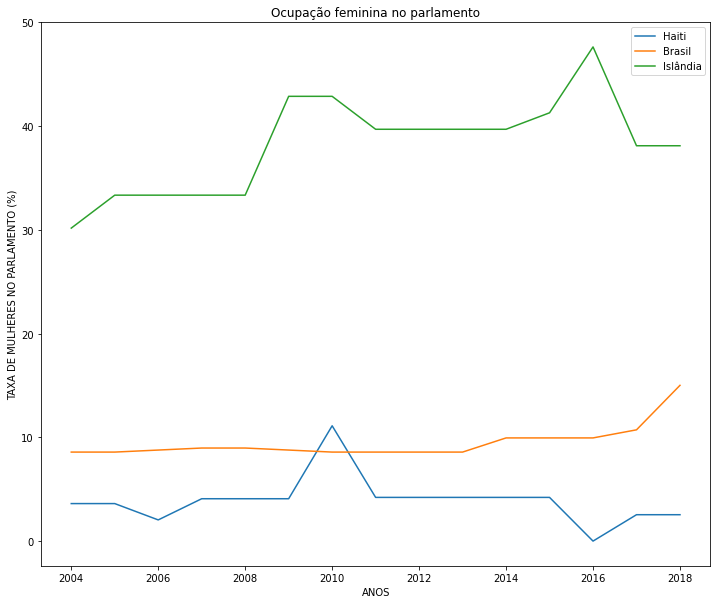

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv('data/API_SG.GEN.PARL.ZS_DS2_en_csv_v2_4413582/API_SG.GEN.PARL.ZS_DS2_en_csv_v2_4413582.csv', skiprows = 4)


anos_str = [str(i) for i in range(2004, 2019)]
anos = [i for i in range(2004, 2019)]

filtro_haiti = df['Country Name'] == 'Haiti'
filtro_br = df['Country Name'] == 'Brazil'
filtro_islandia = df['Country Name'] == 'Iceland'

df_brasil = df[filtro_br]
df_haiti = df[filtro_haiti]
df_noruga = df[filtro_islandia]

taxa_de_mulheres_no_parlamento_do_haiti = df_haiti[anos_str].mean()
taxa_de_mulheres_no_parlamento_do_brasil = df_brasil[anos_str].mean()
taxa_de_mulheres_no_parlamento_da_islandia = df_noruga[anos_str].mean()


plt.figure(figsize=(12,10))
plt.plot(anos, taxa_de_mulheres_no_parlamento_do_haiti)
plt.plot(anos,taxa_de_mulheres_no_parlamento_do_brasil)
plt.plot(anos,taxa_de_mulheres_no_parlamento_da_islandia)
plt.legend(['Haiti', 'Brasil', 'Islândia'])
plt.xlabel("ANOS")
plt.ylabel("TAXA DE MULHERES NO PARLAMENTO (%)")
plt.title('Ocupação feminina no parlamento')
plt.show()



## Análise da relação entre mulheres exercendo funções trabalhistas e a representatividade no parlamento

Em 2018, o Banco Mundial divulgou o relatório Perda de Oportunidades: o elevado custo de não educar as meninas. 
Tal relatório fomentava que a falta de igualdade de gênero traz consigo um grande prejuízo financeiro mundial. 
Por outro lado, focar em questões de gênero e igualdade aumentaria a possibilidade de mulheres participarem integralmente da sociedade e ser membros ativos das suas comunidades, principalmente no mercado de trabalho.
Por isso, o objetivo dessa comparação é observar se uma presença maior de mulheres no parlamento(indicando maior igualdade de gênero nas decisões da sociedade) poderia trazer como consequência uma maior participação das mulheres no mercado de trabalho.




A idéia é traçar correlações entre os gráficos de participação feminina no parlamento e o de inclusão no mercado de trabalho das mulheres.

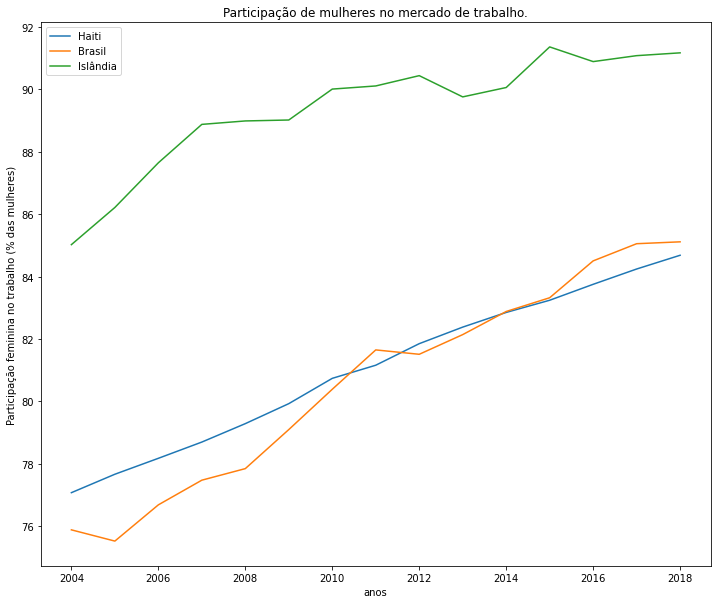

In [3]:
df_servicos = pd.read_csv('data/API_SL.SRV.EMPL.FE.ZS_DS2_en_csv_v2_4354717.csv', skiprows = 4)
df_servicos.head()

filtro_haiti = df['Country Name'] == 'Haiti'
filtro_br = df['Country Name'] == 'Brazil'
filtro_islandia = df['Country Name'] == 'Iceland'

df_brasil_servicos = df_servicos[filtro_br]
df_haiti_servicos = df_servicos[filtro_haiti]
df_noruga_servicos = df_servicos[filtro_islandia]


taxa_servicos_haiti = df_haiti_servicos[anos_str].mean()
taxa_servicos_brasil = df_brasil_servicos[anos_str].mean()
taxa_servicos_islandia = df_noruga_servicos[anos_str].mean()
plt.figure(figsize=(12,10))
plt.plot(anos, taxa_servicos_haiti)
plt.plot(anos,taxa_servicos_brasil)
plt.plot(anos,taxa_servicos_islandia)
plt.legend(['Haiti', 'Brasil', 'Islândia'])
plt.xlabel("anos")
plt.ylabel("Participação feminina no trabalho (% das mulheres)")
plt.title('Participação de mulheres no mercado de trabalho.')
plt.show()



In [4]:
#Correlação
concat_haiti = pd.concat((taxa_de_mulheres_no_parlamento_do_haiti, taxa_servicos_haiti), join='inner', axis=1)
concat_islandia = pd.concat((taxa_de_mulheres_no_parlamento_da_islandia, taxa_servicos_islandia), join='inner', axis=1)
concat_brasil = pd.concat((taxa_de_mulheres_no_parlamento_do_brasil, taxa_servicos_brasil), join='inner', axis=1)
correlacao_islandia = concat_islandia.corr()[1][0]
correlacao_haiti = concat_haiti.corr()[1][0]
correlacao_brasil = concat_brasil.corr()[1][0]

covariancia_islandia = concat_islandia.cov()[1][0]
covariancia_brasil = concat_brasil.cov()[1][0]
covariancia_haiti =  concat_haiti.cov()[1][0]
print(f'A correlação de cada país é: Brasil: {correlacao_brasil}, Haiti:{correlacao_haiti}, Islandia:{correlacao_islandia}')
print(f'A covariância de cada país é: Brasil: {covariancia_brasil}, Haiti:{covariancia_haiti}, Islandia:{covariancia_islandia}')

print(covariancia_islandia)




A correlação de cada país é: Brasil: 0.6066119164159982, Haiti:-0.16881544421302708, Islandia:0.7307175865299576
A covariância de cada país é: Brasil: 3.3765527450262955, Haiti:-0.9717906214949146, Islandia:6.323355042565034
6.323355042565034


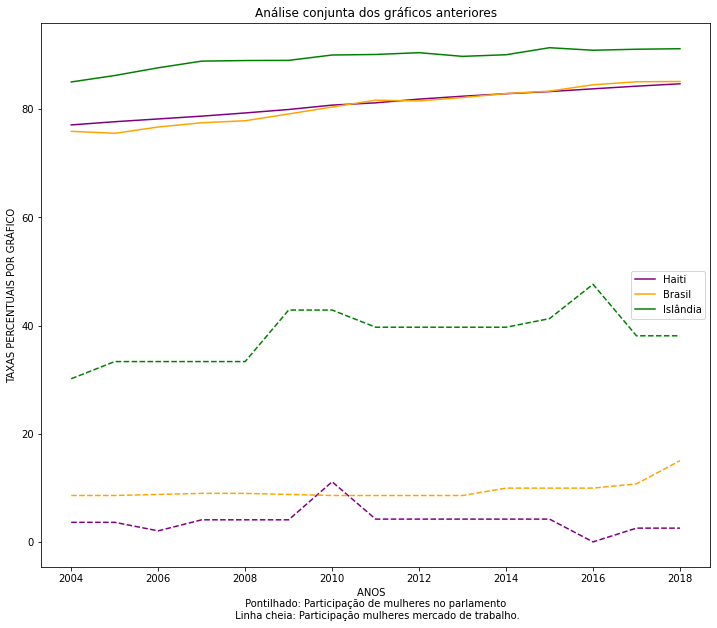

In [18]:
plt.figure(figsize=(12,10))
plt.plot(anos, taxa_servicos_haiti, color = 'purple')
plt.plot(anos,taxa_servicos_brasil, color='orange')
plt.plot(anos,taxa_servicos_islandia, color='green')

plt.plot(anos, taxa_de_mulheres_no_parlamento_do_haiti, color = 'purple', linestyle = 'dashed')
plt.plot(anos,taxa_de_mulheres_no_parlamento_do_brasil, color='orange', linestyle = 'dashed')
plt.plot(anos,taxa_de_mulheres_no_parlamento_da_islandia, color = 'green', linestyle = 'dashed')
plt.xlabel('ANOS   \n Pontilhado: Participação de mulheres no parlamento \n Linha cheia: Participação mulheres mercado de trabalho.')
plt.ylabel('TAXAS PERCENTUAIS POR GRÁFICO')
plt.title('Análise conjunta dos gráficos anteriores')
plt.legend(['Haiti', 'Brasil', 'Islândia'])
plt.show()


Como podemos obsevar no gráfico, a taxa de participação das mulheres no meio trabalhista aumenta em todos os países, e ao avaliar a correlação e a covariância obtemos resultados positivos para o Brasil e Islândia, o que indica uma relação diretamente proporcional entre os indicadores, porém, para o Haiti essa relação é fraca e inversamente proporcional. Com isso, podemos concluir que esses dados estão ligados de alguma forma, mas claramente a taxa de participação feminina no meio trabalhista não é o único fator que influência isso. No Haiti por exemplo, muitos fatores externos podem ter influenciado no andamento dos dados devido às varias crises que o país passou nos últimos anos.

Referências bibliográficas:
    - https://www.worldbank.org/pt/news/press-release/2018/07/11/not-educating-girls-costs-countries-trillions-of-dollars-says-new-world-bank-report#:~:text=Segundo%20o%20relat%C3%B3rio%20Perda%20de,primeiras%20s%C3%A9ries%20do%20ensino%20m%C3%A9dio.


Correções feitas:
- Países com nomes trocados: corrigido
- Afirmação sobre a islândia ser país de referência: Trouxe dados do ElPaís
- Título redundante: Trocado
- rótulos letras minusculas: corrigido
    